In [40]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts


Alicia's analysis 

(Disclaimer: The studied zillow data is only reflecting the typical value for homes in the 35th to 65th percentile range.)

* Find the change in real estate price from 2015 to 2020.
* Find the Max. & Min. housing price of each states (Premium v.s affordable housing price)
* Find the average housing price of each state between 2015 and 2020.
* Shows relationship between homeless population and avg housing price
* Manipulating the data by removing NY and CA states from the dataframe to filter out outliers.
* Finding the homeless rate in % and looking at the relationship between homeless rate and avg housing price.


In [2]:
# Extracting the path
real_estate_path = "../Data/Zillow_AllHomes_5yrs_Clean.csv"

In [3]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
# real_estate_data = pd.read_csv(real_estate_path)
real_estate_data = pd.read_csv(real_estate_path)
real_estate_data

# original dataframe has 914 rows × 75 columns

,RegionName,StateName,SizeRank,RegionID,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020
0,United States,Country,0,102001,190722.0,191467.0,192335.0,193235.0,194147.0,194958.0,...,248440,249439,250595,251849,253057,254320,255845,257804,260091,262604
1,"New York, NY",NY,1,394913,408905.0,410065.0,410802.0,411779.0,412581.0,413688.0,...,483191,484139,485177,486507,488000,489895,492468,495908,500412,505569
2,"Los Angeles-Long Beach-Anaheim, CA",CA,2,753899,526530.0,530547.0,534737.0,537106.0,539643.0,542210.0,...,680279,685435,690691,695044,696786,698190,702883,710534,718779,726379
3,"Chicago, IL",IL,3,394463,206017.0,206142.0,206800.0,207924.0,208932.0,209143.0,...,244738,245092,245678,246204,246794,247545,248846,250588,252917,255532
4,"Dallas-Fort Worth, TX",TX,4,394514,177328.0,178799.0,180484.0,182120.0,183830.0,185516.0,...,258147,258784,259781,260955,262153,263579,265256,267187,269202,271831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,"Lamesa, TX",TX,929,394767,53736.0,53906.0,54068.0,54405.0,54750.0,55107.0,...,75464,75574,75675,75855,76098,76387,76621,76858,77100,77318
910,"Craig, CO",CO,930,753874,164710.0,166051.0,167511.0,168959.0,170713.0,172727.0,...,187904,187767,187773,187876,187968,188152,188263,188376,188477,188683
911,"Pecos, TX",TX,931,394968,NaN,NaN,NaN,NaN,NaN,NaN,...,129050,130440,131600,131928,132350,132891,133018,132368,130725,128486
912,"Vernon, TX",TX,932,395188,56866.0,57187.0,57451.0,57682.0,58006.0,58341.0,...,70018,69886,69751,69660,69645,69578,69558,69536,69554,69449


In [4]:
# pd.read_csv(real_estate_path)["SizeRank"].value_counts(ascending=True)

In [5]:
# Creating a list 
real_estate_date = []
column_names = ["RegionName", "StateName", "SizeRank", "RegionID"]
for x in real_estate_data.columns:
    if x not in column_names:
        real_estate_date.append(x)

In [6]:
real_estate_df = []
for i, row in real_estate_data.iterrows():
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    region_id = row["RegionID"]
    for x in real_estate_date:
        dat = x.split("/")
        a ={
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Region ID": region_id,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Housing Price":row[x]
        }
        real_estate_df.append(a)
        


In [7]:
# creating the new dataframe for easy viewing 
new_RE_df = pd.DataFrame(real_estate_df)
new_RE_df.head()

,Region Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0


In [8]:
# drop NA from the dataframe
new_RE_df = new_RE_df.dropna(how="any")
# new_RE_df.head()

# Drop duplicate 
no_duplicate_RE_df = new_RE_df.drop_duplicates()
# no_duplicate_RE_df.head()


# split city from state, make a new column with just city
no_duplicate_RE_df["Region Name"] = no_duplicate_RE_df["Region Name"].str.split(",").str[0]
# no_duplicate_RE_df.head()

# rename the Region Name to City Name
no_duplicate_RE_df = no_duplicate_RE_df.rename({"Region Name": "City Name"}, axis="columns")
# no_duplicate_RE_df.head()


In [9]:
# mean, max, min
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,10876.0,150832.637734,92470.613915,23303.0,94966.50,125991.5,175459.00,898866.0
2016,10906.0,157750.918760,98699.060293,23430.0,98733.00,130219.0,185140.00,937493.0
2017,10940.0,166191.003656,105269.399338,24316.0,103274.50,136401.5,196437.00,1097507.0
2018,10966.0,175881.987872,113964.266262,25918.0,108626.00,143572.0,208440.00,1239591.0
2019,10968.0,183630.756018,116327.218718,27735.0,113879.75,150620.0,218755.75,1151808.0
2020,9140.0,190548.174070,120739.926230,29557.0,117704.00,156187.0,227485.50,1236298.0


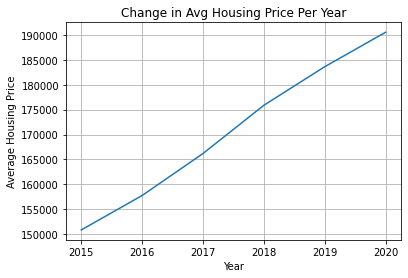

In [10]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(RE_groupby_year.index.values, RE_groupby_year["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Change in Avg Housing Price Per Year")

# plt.xlim(-0.75, len(RE_groupby_year.index.values))
# plt.ylim(145000, max(RE_groupby_year["mean"])+50)

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020
# add x-lim and y- lim


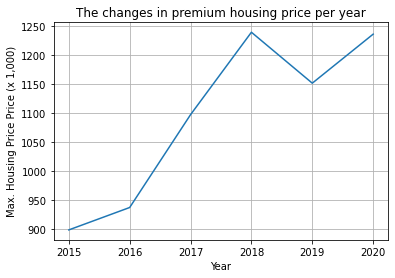

In [11]:
# looking at relationship of how much the max. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["max"]/1000)

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Max. Housing Price Price (x 1,000)")
plt.title("The changes in premium housing price per year")


plt.grid()
plt.show()


In [12]:
# RE_groupby_year["max"]/10000

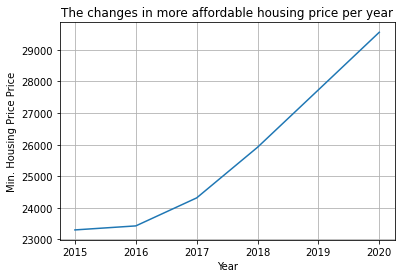

In [13]:
# looking at relationship of how much the min. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["min"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Min. Housing Price Price")
plt.title("The changes in more affordable housing price per year")


plt.grid()
plt.show()


In [14]:
# grouping the housing price by state
RE_groupby_state = no_duplicate_RE_df.groupby(["State Name", "Year"]).describe()["Housing Price"]
# RE_groupby_state.head()

In [15]:
# looking at the median housing price
RE_groupby_state_median = RE_groupby_state["50%"]
# RE_groupby_state_median.head()


In [16]:
state_year_min_max = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].agg(["min", "max"])
# state_year_min_max
# state_year_median = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].median()
# state_year_median




In [17]:
state_year_min_max_2 = state_year_min_max.reset_index()
state_year_min_max_2.sort_values(["State Name", "max"], inplace=True)
state_year_min_max_2.groupby(["State Name", "Year"]).last()

City Name       min       max
State Name Year                              
AK         2015    Juneau  346910.0  359709.0
           2016    Juneau  360629.0  365086.0
           2017    Juneau  365729.0  376272.0
           2018    Juneau  376696.0  384139.0
           2019    Juneau  385363.0  398425.0
...                   ...       ...       ...
WY         2016   Jackson  481377.0  500246.0
           2017   Jackson  500780.0  519805.0
           2018   Jackson  523364.0  563953.0
           2019   Jackson  565748.0  610445.0
           2020   Jackson  613877.0  622816.0

[312 rows x 3 columns]

In [18]:
state_year_min_max2 = state_year_min_max.copy().reset_index()
ls = {}
for i, row in state_year_min_max2.iterrows():
    if row["State Name"] not in ls:
        ls[row["State Name"]] = [10000000000, 0, "", "", 0, 0]
    if ls[row["State Name"]][0]>row["min"]:
        ls[row["State Name"]][0] =row["min"]
        ls[row["State Name"]][2] = row["City Name"]
        ls[row["State Name"]][4] = row["Year"]
    if ls[row["State Name"]][1]<row["max"]:
        ls[row["State Name"]][1] =row["max"]
        ls[row["State Name"]][3] = row["City Name"]
        ls[row["State Name"]][5] = row["Year"]
    a= 1
print(row)
# print(ls)
max_min_state_year = pd.DataFrame(ls).T
max_min_state_year.head()

State Name          WY
Year              2020
City Name     Sheridan
min             275823
max             281947
Name: 5470, dtype: object


,0,1,2,3,4,5
AK,212331,405114,Fairbanks,Juneau,2015,2020
AL,48536,234874,Selma,Daphne,2015,2020
AR,23303,210665,Blytheville,Fayetteville,2015,2020
AZ,125181,385809,Nogales,Flagstaff,2015,2020
CA,134642,1.23959e+06,El Centro,San Jose,2015,2018


In [19]:
#renaming the columns
max_min_state_year = max_min_state_year.rename(columns={
        0: "Min. Housing Price",
        1: "Max. Housing Price",
        2: "City of Min. Housing Price",
        3: "City of Max. Housing Price",
        4: "Year of Min. Housing Price",
        5: "Year of Max. Housing Price"})

max_min_state_year.head()

,Min. Housing Price,Max. Housing Price,City of Min. Housing Price,City of Max. Housing Price,Year of Min. Housing Price,Year of Max. Housing Price
AK,212331,405114,Fairbanks,Juneau,2015,2020
AL,48536,234874,Selma,Daphne,2015,2020
AR,23303,210665,Blytheville,Fayetteville,2015,2020
AZ,125181,385809,Nogales,Flagstaff,2015,2020
CA,134642,1.23959e+06,El Centro,San Jose,2015,2018


In [20]:
max_min_state_year1 = max_min_state_year[max_min_state_year.index !="Country"]
# max_min_state_year1.head()

Text(0.5, 1.0, 'The Min. & Max housing price of each State')

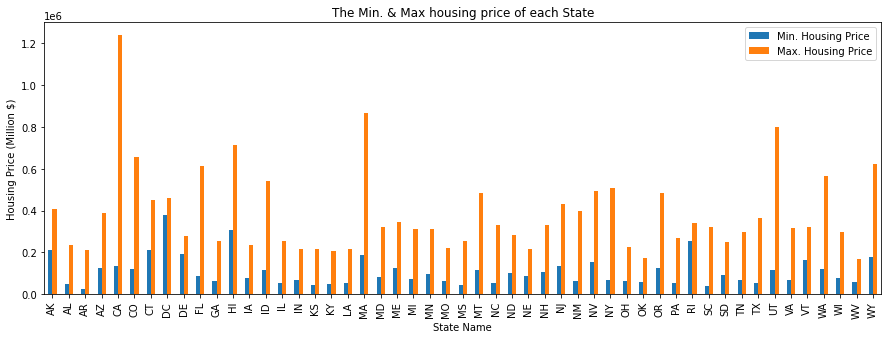

In [21]:
# Ploting the premium housing price and more affordable housing price of each state
max_housing_price_bar = max_min_state_year1.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price (Million $)")
plt.title("The Min. & Max housing price of each State")


In [22]:
# Looking at the median housing price and group by state. Drop the row that said "country"
state_year_median = no_duplicate_RE_df.groupby("State Name")["Housing Price"].median()
state_year_median = state_year_median[state_year_median.index != "Country"]
# state_year_median.head()

Text(0, 0.5, 'Housing Price')

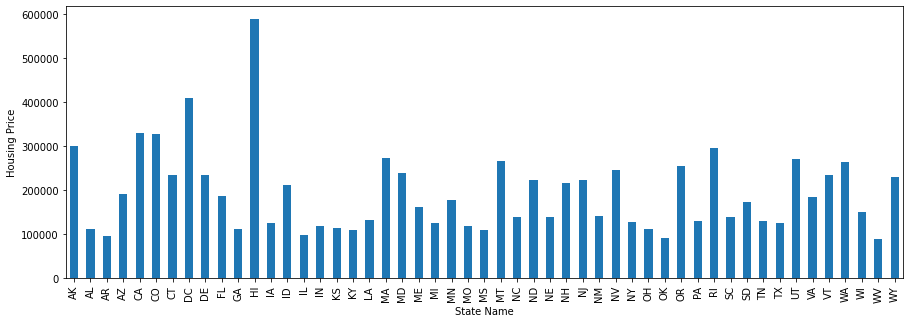

In [23]:
# Avg housing price of each state 
state_year_median_bar = state_year_median.plot(kind="bar", figsize=(15,5))
plt.xlabel("State Name")
plt.ylabel("Housing Price")


In [24]:
homelessdata = "../Data/PIT_AllYearsData_Output.csv"
homeless_df = pd.read_csv(homelessdata)
homeless_df.head()

,Year,State,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Overall Homeless People in Families,Sheltered Total Homeless People in Families,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans
0,2019,AK,1907.0,1634,273,1384,1118,266,523,516,...,99,231,134,97,38,36,2,111,85,26
1,2019,AL,3261.0,2070,1191,2519,1429,1090,742,641,...,139,350,221,129,19,9,10,292,223,69
2,2019,AR,2717.0,1302,1415,2303,972,1331,414,330,...,453,676,223,453,15,15,0,238,153,85
3,2019,AZ,10007.0,5475,4532,7538,3099,4439,2469,2376,...,1210,1766,599,1167,110,67,43,910,598,312
4,2019,CA,151278.0,42846,108432,128777,25323,103454,22501,17523,...,33670,39275,6483,32792,2282,1404,878,10980,3261,7719


In [25]:
#group homeless by state
homeless_df_state = homeless_df.groupby("State").mean()
# homeless_df_state.head()

In [26]:
RE_groupby_state1 = no_duplicate_RE_df.groupby("State Name").describe()["Housing Price"]
RE_groupby_state1.head()

,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AK,280.0,301423.103571,52866.019613,212331.0,267080.50,299388.5,329892.50,405114.0
AL,1470.0,118689.187075,37658.075919,48536.0,94958.50,112293.5,139969.50,234874.0
AR,1400.0,94508.052143,38668.725844,23303.0,65955.75,94758.0,119325.00,210665.0
AZ,767.0,205464.771838,60858.286249,125181.0,158274.00,189987.0,238201.50,385809.0
CA,2356.0,415984.521222,227267.739877,134642.0,240882.00,329970.0,573507.25,1239591.0


In [27]:
# There's a country data in the dataframe, so I drop that from my dataframe.
RE_no_country_df1 = RE_groupby_state1[RE_groupby_state1.index !="Country"]
# RE_no_country_df1


In [28]:
# merging two dataframe together, Real State without Country, and Homeless dataframe
joined_RE_HL = pd.merge(RE_no_country_df1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_RE_HL.head()


,count,mean,std,min,25%,50%,75%,max,Year,Overall Homeless
AK,280.0,301423.103571,52866.019613,212331.0,267080.50,299388.5,329892.50,405114.0,2017,1932.8
AL,1470.0,118689.187075,37658.075919,48536.0,94958.50,112293.5,139969.50,234874.0,2017,3713.8
AR,1400.0,94508.052143,38668.725844,23303.0,65955.75,94758.0,119325.00,210665.0,2017,2583.8
AZ,767.0,205464.771838,60858.286249,125181.0,158274.00,189987.0,238201.50,385809.0,2017,9684.4
CA,2356.0,415984.521222,227267.739877,134642.0,240882.00,329970.0,573507.25,1239591.0,2017,129332.4


(0.23298374795326948, 0.09990430361150422)
The correlation between average housing price and homeless population is 0.23


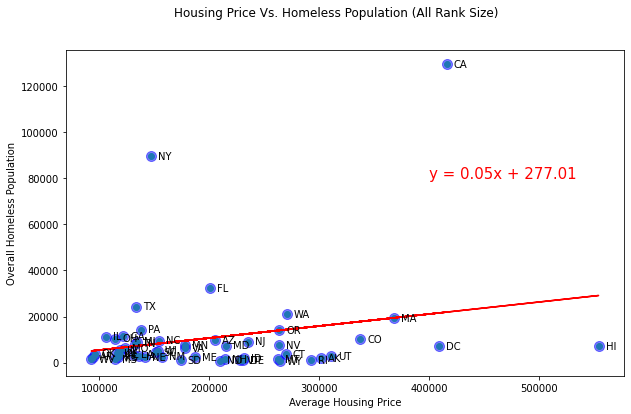

In [29]:
# creating a scatter plot
x = joined_RE_HL["mean"]
y = joined_RE_HL["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")


labels = joined_RE_HL.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Housing Price Vs. Homeless Population (All Rank Size)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,80000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [30]:
# using the homeless dataframe, remove NY and CA. First I removed NY
homeless_no_NY = homeless_df_state[homeless_df_state.index !="NY"]
# homeless_no_NY.head()

# Dropping CA from dataframe
homeless_no_CA_NY = homeless_no_NY[homeless_no_NY.index !="CA"]
# homeless_no_CA_NY.head()

# dropping CA from real estate dataframe
RE_no_CA = RE_no_country_df1[RE_no_country_df1.index !="CA"]
# RE_no_CA.head()

# dropping NY from real estate dataframe
RE_no_CA_NY = RE_no_CA[RE_no_CA.index !="NY"]
# # RE_no_CA_NY.head()

In [31]:
# Make a merge dataframe between real estate and homeless population
joined_no_NY_CA = pd.merge(RE_no_CA_NY, homeless_no_CA_NY, how='inner', left_index= True, right_index=True)
# joined_no_NY_CA


(0.0835522845878693, 0.5681575707628952)
The correlation between average housing price and homeless population is 0.08


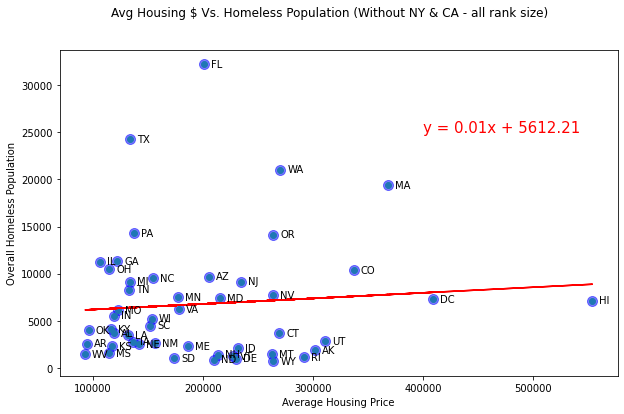

In [32]:
# creating a scatter plot. Plotting the avg housing price and overall homeless number
x = joined_no_NY_CA["mean"]
y = joined_no_NY_CA["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")


labels = joined_no_NY_CA.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Avg Housing $ Vs. Homeless Population (Without NY & CA - all rank size)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,25000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [33]:
# Extracting the path
state_population = "../Data/State_Names_Sheet3.csv"

In [34]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
state_population1 = pd.read_csv(state_population).set_index('State')
state_population1.head()

,Population
State,
AL,4888949
AK,738068
AZ,7123898
AR,3020327
CA,39776830


In [35]:
# homeless_df_state

In [36]:
joined_population_homeless = pd.merge(state_population1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_population_homeless.head()

,Population,Year,Overall Homeless
State,,,
AL,4888949,2017,3713.8
AK,738068,2017,1932.8
AZ,7123898,2017,9684.4
AR,3020327,2017,2583.8
CA,39776830,2017,129332.4


In [37]:
#2017/x100
joined_population_homeless["Homelessness_rate"] = joined_population_homeless["Overall Homeless"]/joined_population_homeless["Population "]*100
# joined_population_homeless["Homelessness_rate"]



In [38]:
joined_2 = pd.merge(RE_no_country_df1, joined_population_homeless, how='inner', left_index=True, right_index=True)
joined_2.head()


,count,mean,std,min,25%,50%,75%,max,Population,Year,Overall Homeless,Homelessness_rate
AK,280.0,301423.103571,52866.019613,212331.0,267080.50,299388.5,329892.50,405114.0,738068,2017,1932.8,0.261873
AL,1470.0,118689.187075,37658.075919,48536.0,94958.50,112293.5,139969.50,234874.0,4888949,2017,3713.8,0.075963
AR,1400.0,94508.052143,38668.725844,23303.0,65955.75,94758.0,119325.00,210665.0,3020327,2017,2583.8,0.085547
AZ,767.0,205464.771838,60858.286249,125181.0,158274.00,189987.0,238201.50,385809.0,7123898,2017,9684.4,0.135942
CA,2356.0,415984.521222,227267.739877,134642.0,240882.00,329970.0,573507.25,1239591.0,39776830,2017,129332.4,0.325145


(0.6346504951743752, 5.695247014302561e-07)
The correlation between average housing price and homeless rate is 0.63


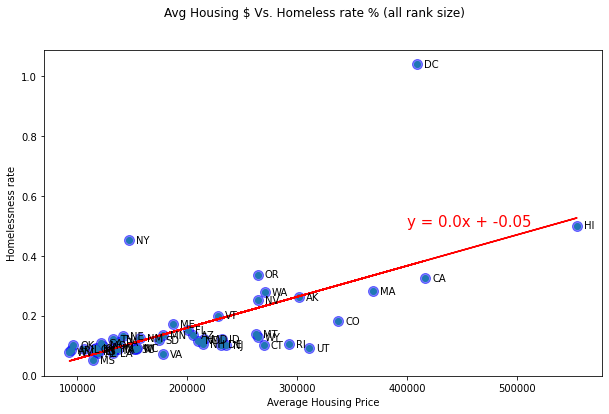

In [39]:
# plot homelessness rate vs. avg pricing 

# creating a scatter plot
x = joined_2["mean"]
y = joined_2["Homelessness_rate"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless rate is {round(correlation[0],2)}")


labels = joined_2.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Avg Housing $ Vs. Homeless rate % (all rank size)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Homelessness rate')
# plt.ylim(0, 0.6)
plt.scatter(x, y)
plt.annotate(line_eq,(400000,0.5),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()